In [ ]:
#!pipenv install numpy --dev

In [ ]:
#!pipenv install pandas --dev

In [1]:
%load_ext blackcellmagic

In [2]:
#!pipenv install black=="19.3b0" blackcellmagic --dev

In [3]:
import numpy as np

In [4]:
import vaex
from ast import literal_eval

In [5]:
df = vaex.from_csv("millio.5_song.csv")

In [6]:
def list_check(i):
    if type(i) == list:
        return i


def extract_links(list_of_tuples):
    """
    1. List of tuples was saved as a string, turn it back into a list
    2. Turn Tuples into list. Output is a list of strings & lists
    3. filter only the lists, drop the identifiers such as "Written by". Output is a list of lists. 
    4. Turn the list of lists into one list
        4a. Remove stuff from the url stuff from the song url to get an identifier.
    """
    a = literal_eval(list_of_tuples)
    a = list(filter(list_check, [i[1] for i in a]))
    a = [
        j.replace("https://genius.com/artists/", "")
        .replace("https://genius.com/", "")
        .replace("artists/", "")
        .replace("-lyrics", "")
        .lower()
        for i in a
        for j in i
    ]
    return a
def get_header_links(item):
    """
    1. List was saved as a string. turn it back into a list
    2. 
    """
    item = literal_eval(item)
    if (type(item) == list) &( len(item)>0):
        item = item[0].replace("https://genius.com/artists/", "")
        item = item.lower()
        return [item]

In [7]:
df.drop(df.index,inplace=True)

#,song_num,title,url,lyrics,side_table,header_links
0,109,The World Is Yours,https://genius.com/Nas-the-world-is-yours-lyrics,"""['[Produced by Pete Rock]', '[Chorus: Pete Rock...","""[('Written By', ['https://genius.com/artists/Pe...",['https://genius.com/artists/Nas']
1,129,Rain,https://genius.com/Chamillionaire-rain-lyrics,"""['[Talking]', 'I was sitting back, and I was th...","""[('Written By', ['https://genius.com/artists/Sc...",['https://genius.com/artists/Chamillionaire']
2,118,Glass,https://genius.com/Pill-glass-lyrics,"'[\'[Verse 1 - Pill]\', ""Every morning I wake up, ...",[],['https://genius.com/artists/Pill']
3,123,It's Like That,https://genius.com/Jay-z-its-like-that-lyrics,"'[\'[Intro: Jay-Z, Kid Capri & Both]\', ""Yeah, uh-...","""[('Written By', ['https://genius.com/artists/Fr...",['https://genius.com/artists/Jay-z']
4,104,Angelz,https://genius.com/Mf-doom-angelz-lyrics,"'[\'[Intro: Ghostface Killah]\', ""Yea, that\'s righ...","""[('Written By', ['https://genius.com/artists/Mf...",['https://genius.com/artists/Mf-doom']
...,...,...,...,...,...,...
"1,570,995",10861,A Place in the Sun,'https://genius.com/Bless-1-a-place-in-the-sun-l...,"""['Bless 1:', 'Unorthodox pattern of talking, wo...",[],['https://genius.com/artists/Bless-1']
"1,570,996",10860,Shit Ain't Over,'https://genius.com/Bloods-and-crips-shit-aint-o...,"'[\'[GREEN EYES]\', ""I\'m wearin\' my colors: red sh...","[('Release Date', [])]",['https://genius.com/artists/Bloods-and-crips']
"1,570,997",10846,Slob 187,'https://genius.com/Bloods-and-crips-slob-187-ly...,"""['[Verse 1: Scarface]', 'I woke up one morning'...","""[('Written By', ['https://genius.com/artists/Tr...",['https://genius.com/artists/Bloods-and-crips']
"1,570,998",10842,G's & Loc's,'https://genius.com/Bloods-and-crips-gs-and-locs...,"""['[Verse 1: Batman]', 'I wake up in the morning...","""[('Written By', ['https://genius.com/artists/Li...",['https://genius.com/artists/Bloods-and-crips']


In [8]:
%%time
df.add_virtual_column("meta_data_1",df.side_table.apply(extract_links))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 218 µs


In [9]:
df.add_virtual_column("fixed_header_links", df.header_links.apply(get_header_links))

In [10]:
md1 = df.evaluate(df.meta_data_1)
h = df.evaluate(df.fixed_header_links)

In [11]:
df.head(5)

#,song_num,title,url,lyrics,side_table,header_links,meta_data_1,fixed_header_links
0,109,The World Is Yours,https://genius.com/Nas-the-world-is-yours-lyrics,"""['[Produced by Pete Rock]', '[Chorus: Pete Rock...","""[('Written By', ['https://genius.com/artists/Pe...",['https://genius.com/artists/Nas'],"""['pete-rock', 'nas', 'jamey-staub', 'tony-dawse...",['nas']
1,129,Rain,https://genius.com/Chamillionaire-rain-lyrics,"""['[Talking]', 'I was sitting back, and I was th...","""[('Written By', ['https://genius.com/artists/Sc...",['https://genius.com/artists/Chamillionaire'],"['scarface', 'billy-crook', 'chamillionaire']",['chamillionaire']
2,118,Glass,https://genius.com/Pill-glass-lyrics,"'[\'[Verse 1 - Pill]\', ""Every morning I wake up, ...",[],['https://genius.com/artists/Pill'],[],['pill']
3,123,It's Like That,https://genius.com/Jay-z-its-like-that-lyrics,"'[\'[Intro: Jay-Z, Kid Capri & Both]\', ""Yeah, uh-...","""[('Written By', ['https://genius.com/artists/Fr...",['https://genius.com/artists/Jay-z'],"""['frank-friedman', 'kid-capri', 'jay-z', 'kevin...",['jay-z']
4,104,Angelz,https://genius.com/Mf-doom-angelz-lyrics,"'[\'[Intro: Ghostface Killah]\', ""Yea, that\'s righ...","""[('Written By', ['https://genius.com/artists/Mf...",['https://genius.com/artists/Mf-doom'],"""['mf-doom', 'ghostface-killah', 'mf-doom', 'jas...",['mf-doom']


In [12]:
def return_longest(a,b):
    if (type(a)==list) & (type(b)==list):
        if len(a)>len(b):
            return a
        else:
            return b
    elif type(b)!=list:
        return a

In [13]:
df.add_column("meta_data_2",np.array([return_longest(a,b) for a,b in zip(md1,h)]))

In [31]:
df.add_virtual_column(
    "song_identifier",
    df.url.str.replace("https://genius.com/", "")
    .str.replace("-lyrics", "")
    .str.replace("https://genius.com/artists/", "")
    .str.lower()
)

In [79]:
from collections import Counter
si_count = Counter([i for i in df.song_identifier.evaluate() ])

In [81]:
si_count.most_common(50)

[('eminem-role-model', 158),
 ('clipse-chinese-new-year', 158),
 ('lil-wayne-georgia-bush-weezyz-ambitionz', 158),
 ('lil-wayne-doa', 158),
 ('dj-khaled-we-takin-over', 158),
 ('camron-bubble-music', 158),
 ('jay-z-the-rulers-back', 158),
 ('lil-wayne-dr-carter', 158),
 ('camron-living-a-lie', 158),
 ('jay-z-hard-knock-life-ghetto-anthem', 158),
 ('big-pun-boomerang', 158),
 ('camron-we-make-change', 158),
 ('big-l-ebonics', 158),
 ('sean-price-onion-head', 158),
 ('slaughterhouse-onslaught', 158),
 ('the-notorious-big-gimme-the-loot', 158),
 ('jay-z-venus-vs-mars', 158),
 ('clipse-young-boy', 158),
 ('lil-wayne-wayne-on-me', 158),
 ('snoop-dogg-twas-the-night-before-christmas', 158),
 ('clipse-nightmares', 158),
 ('aesop-rock-labor', 158),
 ('clipse-popular-demand-popeyes', 158),
 ('warren-g-regulate', 158),
 ('camron-leave-me-alone-pt-2', 158),
 ('lil-wayne-ice-cream', 158),
 ('lil-wayne-the-rapper-eater', 158),
 ('eminem-lose-yourself', 158),
 ('camron-soap-opera', 158),
 ('camron-g

# Bag of Words vectorization for song meta data

Networkx graph is coming out way too small. I have over 9 million edges. But the graph has 55046 nodes?

### why list comprehension
list comprehesion worked where numpy vectorization and vaex built in string operations failed.

In [53]:
d = df.meta_data_2.evaluate()

In [54]:
data_strings = [" ".join(i) for i in d]

### Build vocabulary
countvectorizer() turns `'pete-rock'` into `['pete','rock']`
So we need to build a new vocabulary

In [55]:
data_vocabulary = list(" ".join(data_strings).split(" "))

In [56]:
len(data_vocabulary)

9142305

In [57]:
len(set(data_vocabulary))

24214

# 9 million features condenses into 24k nodes
maybe the edgelist wasn't that far off

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
)

In [ ]:
vectorizer.vocabulary =set(data_vocabulary)

In [ ]:
X = vectorizer.fit_transform(data_strings)

In [ ]:
len(vectorizer.vocabulary_)

In [ ]:
X

### Back to Vaex
This is going to be very round-about-way.

This did not work, skip to truncated SVD for now.

In [ ]:
# import pyarrow
# pyarrow.array(X)

### Truncated SVD
used because the truncated form can take sparse matrices.

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=30, random_state=42)

In [ ]:
%%time
x_svd = svd.fit_transform(X)  

In [ ]:
x_svd.shape

# Get lyric embeddings

In [6]:
npl = df.lyrics.evaluate()

In [7]:
npl[352479]

'[]'

In [12]:
import re


def clean_lyrics(lyrics):
    """
    1. turn the pickled list into into an actual list
    2. rejoin the list into one string
    3. regex and other string operations to clean the lyrics
    """
    lyrics = literal_eval(lyrics)
    l = " ".join(lyrics)
#     l = re.sub(
#         r'\[Produced by.+?]|\[Intro.+?\]|\[Chorus|\[Hook|\[Outro|\[Interlude|\[Pre-Chorus|\[Bridge|\[Skit|\[Pre-Hook|\[Refrain|\[Verse|\[Break',
#         " ",
#         l
#     )
    l = re.sub(r'\[(.+?)\]|"', " ", l)
    return (
        l.replace("'", "")
        .replace(r", ", " ")
        .replace("(", "")
        .replace(")", "")
        .replace("?", "")
        .replace(":" "", "")
        .strip()
        .lower(),
    )

In [69]:
clean_lyrics(npl[641956])

('yeah!   i was like porsche puller air force footer automatic wristed therefore shook-up causing a stir every time i push up 007 with a jester and a look-up its carrera-ella from the f&f crew with a tiger on his shirt alligator on his blues with a nice young lady and some righteous kung-fu im fighting without fighting enlightening you young fools frankensteins of mine i tighten you young screws send lighting to your mind and make you move car like cannonball run! im lighting my guns fuse one that mean ill lean and leave you i mean this needlz they hook to my hooks they rehearse my verse and they sing my singles i cant even see you   with it tilted brim low brim low with a cartier eye and his car go by like neeeeeeooooowwwww! tilted tilted brim low brim low with a cartier eye and his car go by like neeeeeeooooowwwww! fresh-to-def f&f!   i wear cartier glasses van dutch pants-es gameboy advances next to the black berry im next to my black berry molasses hat very slanted rapping to the r

I should definitely have been visualizing data earlier. There are a few outliers causing problems. no lyrics...

I was way too confident in my data.

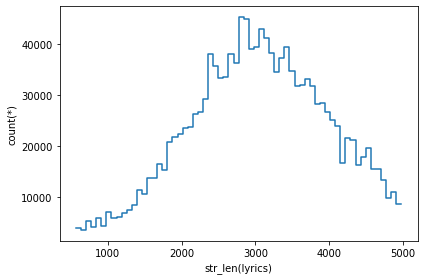

In [65]:
import matplotlib.pyplot
dff.plot1d(df.lyrics.str.len())

In [10]:
# filter the dataset
dff = df[(df.lyrics.str.len() >= 500) & (df.lyrics.str.len() < 5000)]


In [11]:
dff.head(5)

#,song_num,title,url,lyrics,side_table,header_links,index
0,109,The World Is Yours,https://genius.com/Nas-the-world-is-yours-lyrics,"""['[Produced by Pete Rock]', '[Chorus: Pete Rock...","""[('Written By', ['https://genius.com/artists/Pe...",['https://genius.com/artists/Nas'],0
1,129,Rain,https://genius.com/Chamillionaire-rain-lyrics,"""['[Talking]', 'I was sitting back, and I was th...","""[('Written By', ['https://genius.com/artists/Sc...",['https://genius.com/artists/Chamillionaire'],1
2,118,Glass,https://genius.com/Pill-glass-lyrics,"'[\'[Verse 1 - Pill]\', ""Every morning I wake up, ...",[],['https://genius.com/artists/Pill'],2
3,123,It's Like That,https://genius.com/Jay-z-its-like-that-lyrics,"'[\'[Intro: Jay-Z, Kid Capri & Both]\', ""Yeah, uh-...","""[('Written By', ['https://genius.com/artists/Fr...",['https://genius.com/artists/Jay-z'],3
4,104,Angelz,https://genius.com/Mf-doom-angelz-lyrics,"'[\'[Intro: Ghostface Killah]\', ""Yea, that\'s righ...","""[('Written By', ['https://genius.com/artists/Mf...",['https://genius.com/artists/Mf-doom'],4


In [13]:
dff.add_virtual_column("clean_lyrics",dff.lyrics.apply(clean_lyrics) )

In [53]:
len(dff)

1448897

In [15]:
cl = dff.clean_lyrics.evaluate()

In [16]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

INFO:MainThread:gensim.summarization.textcleaner:'pattern' package not found; tag filters are not available for English


In [17]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(cl)]

In [18]:
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [19]:
model.build_vocab(documents)

INFO:MainThread:gensim.models.doc2vec:collecting all words and their counts
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #10000, processed 10000 words (19813/s), 9232 word types, 10000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #20000, processed 20000 words (18219/s), 9265 word types, 20000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #30000, processed 30000 words (20165/s), 9266 word types, 30000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #40000, processed 40000 words (19325/s), 9299 word types, 40000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #50000, processed 50000 words (20626/s), 9299 word types, 50000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #60000, processed 60000 words (20053/s), 9300 word types, 60000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS:

INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #630000, processed 630000 words (13085/s), 9375 word types, 630000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #640000, processed 640000 words (8906/s), 9375 word types, 640000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #650000, processed 650000 words (12252/s), 9375 word types, 650000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #660000, processed 660000 words (11288/s), 9375 word types, 660000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #670000, processed 670000 words (8123/s), 9375 word types, 670000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #680000, processed 680000 words (9975/s), 9375 word types, 680000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #690000, processed 690000 words (4757/s), 9375 word types, 690000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #700000, processed 700000 wo

INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1260000, processed 1260000 words (8200/s), 9376 word types, 1260000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1270000, processed 1270000 words (10221/s), 9376 word types, 1270000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1280000, processed 1280000 words (12878/s), 9376 word types, 1280000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1290000, processed 1290000 words (8162/s), 9376 word types, 1290000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1300000, processed 1300000 words (9676/s), 9376 word types, 1300000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1310000, processed 1310000 words (14122/s), 9376 word types, 1310000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #1320000, processed 1320000 words (9880/s), 9376 word types, 1320000 tags
INFO:MainThread:gensim.models.doc2vec:PROGRESS: at example #133000

In [20]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

INFO:MainThread:gensim.models.base_any2vec:training model with 3 workers on 9375 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 0.69% examples, 6161 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 2.76% examples, 11641 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 4.14% examples, 15100 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 4.83% examples, 13938 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 6.21% examples, 15848 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 6.90% examples, 15137 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 8.28% examples, 15776 words/s, in_qsize 6, out_qsiz

INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 72.47% examples, 14093 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 73.16% examples, 14052 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 74.54% examples, 14174 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 75.23% examples, 14139 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 76.61% examples, 14210 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 77.30% examples, 14232 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 77.99% examples, 14214 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 79.37% examples, 14233 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 40.72% examples, 14614 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 41.41% examples, 14471 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 42.79% examples, 14606 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 43.48% examples, 14617 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 44.17% examples, 14630 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 44.86% examples, 14618 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 46.24% examples, 14666 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 46.93% examples, 14698 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 19.33% examples, 15135 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 20.71% examples, 15404 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 21.40% examples, 15220 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 22.09% examples, 14967 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 23.47% examples, 15073 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 24.16% examples, 14570 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 24.85% examples, 14479 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 26.23% examples, 14378 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 94.55% examples, 15486 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 95.94% examples, 15535 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 96.63% examples, 15519 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 98.01% examples, 15623 words/s, in_qsize 3, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 98.70% examples, 15555 words/s, in_qsize 2, out_qsize 1
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH - 3 : training on 1448897 raw words (2

INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 68.33% examples, 15063 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 69.02% examples, 15096 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 70.40% examples, 15119 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 71.78% examples, 15179 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 72.47% examples, 15130 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 73.85% examples, 15214 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 74.54% examples, 15184 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 75.23% examples, 15215 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 33.13% examples, 14275 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 33.82% examples, 13973 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 35.89% examples, 13916 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 37.27% examples, 14192 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 37.96% examples, 13966 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 39.34% examples, 14259 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 40.03% examples, 14114 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 41.41% examples, 14392 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 16.56% examples, 15889 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 17.25% examples, 15230 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 18.63% examples, 15099 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 19.33% examples, 15082 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 20.71% examples, 14531 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 22.09% examples, 15040 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 22.78% examples, 14534 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 24.16% examples, 14309 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 100.00% examples, 15071 words/s, in_qsize 0, out_qsize 1
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH - 6 : training on 1448897 raw words (2897793 effective words) took 192.3s, 15070 effective words/s
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 0.69% examples, 5156 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 2.76% examples, 9519 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 4.14% examples, 12665 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at

INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 70.40% examples, 14540 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 71.78% examples, 14696 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 72.47% examples, 14536 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 74.54% examples, 14613 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 75.92% examples, 14693 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 76.61% examples, 14633 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 77.99% examples, 14539 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 78.68% examples, 14503 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 44.17% examples, 14828 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 45.55% examples, 14903 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 46.24% examples, 14943 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 47.62% examples, 14944 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 48.31% examples, 14965 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 49.69% examples, 15036 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 50.38% examples, 15060 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 51.76% examples, 15068 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 24.16% examples, 14574 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 24.85% examples, 14466 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 26.23% examples, 14054 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 26.92% examples, 14071 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 28.30% examples, 14019 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 28.99% examples, 13983 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 30.37% examples, 14125 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 31.06% examples, 14121 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.m

INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH - 9 : training on 1448897 raw words (2897793 effective words) took 193.7s, 14962 effective words/s
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 0.69% examples, 4146 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 2.76% examples, 8544 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 4.83% examples, 11369 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 6.21% examples, 13138 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 74.54% examples, 14431 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 75.23% examples, 14313 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 76.61% examples, 14435 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 77.30% examples, 14357 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 77.99% examples, 14349 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 79.37% examples, 14353 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 80.75% examples, 14483 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 81.44% examples, 14402 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 48.31% examples, 13830 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 50.38% examples, 13935 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 52.45% examples, 13833 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 54.52% examples, 14001 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 56.59% examples, 14040 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 58.67% examples, 14236 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 60.05% examples, 14257 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 60.74% examples, 14125 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 26.23% examples, 14004 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 26.92% examples, 13354 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 28.30% examples, 13584 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 28.99% examples, 13493 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 30.37% examples, 13616 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 31.06% examples, 13509 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 32.44% examples, 13797 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 33.13% examples, 13534 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 93.17% examples, 14811 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 93.86% examples, 14811 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 95.24% examples, 14843 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 95.94% examples, 14808 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 97.32% examples, 14855 words/s, in_qsize 4, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 98.70% examples, 14983 words/s, in_qsize 2, out_qsize 1
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 99.39% examples, 14974 words/s, in_qsize 1, out_qsize 1
INFO:MainThread:gensim.models.base_any

INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 69.71% examples, 14326 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 71.09% examples, 14460 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 71.78% examples, 14354 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 73.16% examples, 14330 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 73.85% examples, 14273 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 74.54% examples, 14242 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 75.23% examples, 14207 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 76.61% examples, 14256 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 35.89% examples, 13139 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 36.58% examples, 13172 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 37.96% examples, 13196 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 39.34% examples, 13347 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 40.03% examples, 13354 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 41.41% examples, 13423 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 42.79% examples, 13691 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 43.48% examples, 13574 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 1.38% examples, 8182 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 2.76% examples, 9772 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 4.14% examples, 11583 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 4.83% examples, 10867 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 6.21% examples, 12814 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 6.90% examples, 11955 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 8.28% examples, 13238 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 8.97% examples, 12874 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.mod

INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 72.47% examples, 14105 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 73.85% examples, 14193 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 74.54% examples, 14177 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 75.23% examples, 14209 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 75.92% examples, 14201 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 76.61% examples, 14182 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 77.99% examples, 14239 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 78.68% examples, 14251 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 50.38% examples, 14467 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 51.76% examples, 14577 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 52.45% examples, 14235 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 53.83% examples, 14436 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 54.52% examples, 14432 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 55.90% examples, 14562 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 56.59% examples, 14463 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 16 - PROGRESS: at 57.98% examples, 14685 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 20.02% examples, 14760 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 20.71% examples, 14557 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 21.40% examples, 14646 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 22.78% examples, 14013 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 24.16% examples, 13950 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 24.85% examples, 14031 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 25.54% examples, 14117 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 26.23% examples, 13910 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 92.48% examples, 14701 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 93.17% examples, 14729 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 94.55% examples, 14776 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 95.24% examples, 14679 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 96.63% examples, 14756 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 97.32% examples, 14733 words/s, in_qsize 4, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 98.01% examples, 14759 words/s, in_qsize 3, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 17 - PROGRESS: at 98.70% examples, 14715 words/s, in_qsize 2, out_qsize 1
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 61.43% examples, 14723 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 62.81% examples, 14819 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 63.50% examples, 14718 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 64.19% examples, 14731 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 65.57% examples, 14710 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 66.95% examples, 14886 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 67.64% examples, 14787 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 18 - PROGRESS: at 69.02% examples, 14821 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 41.41% examples, 13928 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 42.79% examples, 14178 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 43.48% examples, 14128 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 44.86% examples, 14288 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 45.55% examples, 14217 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 46.93% examples, 14351 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 47.62% examples, 14298 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 19 - PROGRESS: at 49.00% examples, 14378 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 11.04% examples, 15167 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 11.73% examples, 15244 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 12.42% examples, 15401 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 13.11% examples, 15392 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 13.80% examples, 15117 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 15.18% examples, 15631 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 15.87% examples, 14956 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 16.56% examples, 15039 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 85.58% examples, 14209 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 87.65% examples, 14280 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 89.72% examples, 14358 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 91.79% examples, 14410 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 93.17% examples, 14532 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 93.86% examples, 14492 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 94.55% examples, 14496 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 20 - PROGRESS: at 95.94% examples, 14565 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 74.54% examples, 14731 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 75.23% examples, 14565 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 77.30% examples, 14597 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 79.37% examples, 14582 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 81.44% examples, 14619 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 83.51% examples, 14672 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 85.58% examples, 14509 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 21 - PROGRESS: at 87.65% examples, 14569 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 58.67% examples, 14505 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 60.05% examples, 14564 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 60.74% examples, 14561 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 61.43% examples, 14566 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 62.12% examples, 14595 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 62.81% examples, 14628 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 63.50% examples, 14528 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 22 - PROGRESS: at 64.88% examples, 14647 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 26.23% examples, 13246 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 28.30% examples, 12983 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 29.68% examples, 13364 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 30.37% examples, 13028 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 31.06% examples, 13064 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 32.44% examples, 13239 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 33.13% examples, 13260 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 23 - PROGRESS: at 33.82% examples, 13268 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH - 23 : training on 1448897 raw words (2897793 effective words) took 201.8s, 14362 effective words/s
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 0.69% examples, 5030 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 2.76% examples, 11148 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 4.83% examples, 13255 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 6.90% examples, 14412 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 8.97% examples, 14830 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2v

INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 75.23% examples, 14536 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 77.30% examples, 14532 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 79.37% examples, 14564 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 81.44% examples, 14594 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 83.51% examples, 14670 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 85.58% examples, 14714 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 87.65% examples, 14770 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 24 - PROGRESS: at 89.03% examples, 14910 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 49.69% examples, 14244 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 50.38% examples, 14163 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 52.45% examples, 14300 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 53.83% examples, 14487 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 54.52% examples, 14421 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 55.21% examples, 14252 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 56.59% examples, 14321 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 25 - PROGRESS: at 57.98% examples, 14510 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 17.25% examples, 14071 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 17.94% examples, 13541 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 18.63% examples, 13681 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 20.02% examples, 13735 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 21.40% examples, 14092 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 22.09% examples, 13184 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 23.47% examples, 13716 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 24.16% examples, 13136 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 90.41% examples, 14525 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 91.79% examples, 14618 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 92.48% examples, 14549 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 93.86% examples, 14639 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 94.55% examples, 14621 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 95.94% examples, 14727 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 96.63% examples, 14684 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 26 - PROGRESS: at 97.32% examples, 14706 words/s, in_qsize 4, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 60.74% examples, 14271 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 61.43% examples, 14236 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 62.12% examples, 14272 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 63.50% examples, 14179 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 65.57% examples, 14315 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 66.26% examples, 14353 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 66.95% examples, 14391 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 27 - PROGRESS: at 67.64% examples, 14386 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 28.99% examples, 14288 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 29.68% examples, 14377 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 30.37% examples, 14360 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 31.06% examples, 14309 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 32.44% examples, 14427 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 33.13% examples, 14380 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 33.82% examples, 14426 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 28 - PROGRESS: at 34.51% examples, 14321 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 2.76% examples, 9205 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 4.83% examples, 11245 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 6.90% examples, 12783 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 8.28% examples, 14028 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 8.97% examples, 13872 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 9.66% examples, 14041 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 11.04% examples, 14535 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 11.73% examples, 14569 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.

INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 77.99% examples, 14611 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 78.68% examples, 14541 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 79.37% examples, 14537 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 80.75% examples, 14617 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 81.44% examples, 14569 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 82.82% examples, 14668 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 83.51% examples, 14651 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 29 - PROGRESS: at 84.89% examples, 14700 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 54.52% examples, 14604 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 55.21% examples, 14652 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 55.90% examples, 14668 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 56.59% examples, 14678 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 57.98% examples, 14784 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 58.67% examples, 14731 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 60.05% examples, 14515 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 30 - PROGRESS: at 61.43% examples, 14654 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 33.13% examples, 14916 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 33.82% examples, 14873 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 34.51% examples, 14937 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 35.20% examples, 14950 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 35.89% examples, 14869 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 37.27% examples, 14823 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 37.96% examples, 14799 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 31 - PROGRESS: at 39.34% examples, 14791 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 0.69% examples, 4975 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 2.76% examples, 9873 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 4.83% examples, 12901 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 6.21% examples, 14574 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 6.90% examples, 14175 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 7.59% examples, 14502 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 8.97% examples, 15049 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 9.66% examples, 14935 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.mod

INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 71.09% examples, 14415 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 71.78% examples, 14333 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 73.16% examples, 14395 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 73.85% examples, 14376 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 75.23% examples, 14388 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 76.61% examples, 14286 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 77.30% examples, 14292 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 32 - PROGRESS: at 77.99% examples, 14306 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 46.24% examples, 13941 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 46.93% examples, 13967 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 47.62% examples, 13978 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 48.31% examples, 13998 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 49.00% examples, 14009 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 50.38% examples, 14149 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 51.07% examples, 14078 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 33 - PROGRESS: at 52.45% examples, 14271 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 14.49% examples, 15327 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 15.87% examples, 15503 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 16.56% examples, 15279 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 17.94% examples, 15360 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 18.63% examples, 14925 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 19.33% examples, 15042 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 20.71% examples, 14913 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 22.09% examples, 15346 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 88.34% examples, 14551 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 89.72% examples, 14692 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 90.41% examples, 14615 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 91.79% examples, 14716 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 92.48% examples, 14700 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 93.86% examples, 14760 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 94.55% examples, 14744 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 34 - PROGRESS: at 95.94% examples, 14803 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 62.81% examples, 14632 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 63.50% examples, 14535 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 64.88% examples, 14696 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 65.57% examples, 14555 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 66.95% examples, 14686 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 67.64% examples, 14636 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 68.33% examples, 14618 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 35 - PROGRESS: at 69.02% examples, 14608 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 33.82% examples, 13939 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 34.51% examples, 13719 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 35.89% examples, 13923 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 36.58% examples, 13874 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 37.96% examples, 13863 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 39.34% examples, 13679 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 40.03% examples, 13722 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 36 - PROGRESS: at 41.41% examples, 13766 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 15.18% examples, 14806 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 15.87% examples, 14411 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 16.56% examples, 14547 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 17.25% examples, 14707 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 17.94% examples, 14269 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 18.63% examples, 14006 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 20.02% examples, 13282 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 20.71% examples, 13032 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 81.44% examples, 14272 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 82.13% examples, 14305 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 83.51% examples, 14282 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 85.58% examples, 14218 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 87.65% examples, 14253 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 89.72% examples, 14304 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 91.10% examples, 14418 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 37 - PROGRESS: at 91.79% examples, 14370 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 49.69% examples, 14199 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 50.38% examples, 14135 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 51.76% examples, 14359 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 52.45% examples, 14231 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 53.83% examples, 14457 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 54.52% examples, 14198 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 56.59% examples, 14369 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 38 - PROGRESS: at 57.98% examples, 14580 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 20.71% examples, 14161 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 22.78% examples, 14349 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 24.16% examples, 14351 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 24.85% examples, 14444 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 26.23% examples, 14217 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 28.30% examples, 13878 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 28.99% examples, 13871 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 39 - PROGRESS: at 30.37% examples, 13937 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:

INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:MainThread:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:MainThread:gensim.models.base_any2vec:EPOCH - 39 : training on 1448897 raw words (2897793 effective words) took 193.9s, 14948 effective words/s
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 0.69% examples, 4297 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 2.76% examples, 9849 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 4.83% examples, 12060 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 6.21% examples, 13774 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS

INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 71.09% examples, 14699 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 71.78% examples, 14689 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 72.47% examples, 14700 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 73.16% examples, 14646 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 74.54% examples, 14748 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 75.23% examples, 14708 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 75.92% examples, 14743 words/s, in_qsize 6, out_qsize 0
INFO:MainThread:gensim.models.base_any2vec:EPOCH 40 - PROGRESS: at 76.61% examples, 14738 words/s, in_qsize 5, out_qsize 0
INFO:MainThread:

In [22]:
#INFO:MainThread:gensim.models.base_any2vec:training on a 57955880 raw words (115911720 effective words) took 7759.6s, 14938 effective words/s

In [ ]:
x ="Yeah, I'm gonna take my horse to the old town road I'm gonna ride 'til \
I can't no more I'm gonna take my horse to the old town \
road I'm gonna ride 'til I can't no more\
I got the horses in the back\
Horse tack is attached\
Hat is matte black\
Got the boots that's black to match\
Ridin' on a horse, ha\
You can whip your Porsche\
I been in the valley\
You ain't been up off that porch, now"

In [ ]:
x = x.split(" ")

In [ ]:
y = "Hat down, cross town, livin' like a rockstar\
Spent a lot of money on my brand new guitar\
Baby's got a habit: diamond rings and Fendi sports bras\
Ridin' down Rodeo in my Maserati sports car\
Got no stress, I've been through all that\
I'm like a Marlboro Man so I kick on back\
Wish I could roll on back to that old town road\
I wanna ride 'til I can't no more"

In [ ]:
y= y.split(" ")

In [ ]:
x = model.infer_vector(x)

In [ ]:
model.infer_vector(y)

In [24]:
pj = "Yamborghini chain, rest in peace to my superior\
Hermès link could feed a village in Liberia\
TMZ taking pictures, causin' mad hysteria\
Momma see me on BET and started tearin' up\
I'ma start killin' niggas, how you get that trife?\
I attended Harlem picnics where you risked your life\
Uncle used to skim work, sellin' nicks at night\
I was only 8 years old, watching Nick at Nite\
Uncle Psycho was in that bathroom buggin'!\
Knife to his guts, hope Daddy don't cut him\
Suicidal thoughts brought to me with no advisory\
He was pitchin' dummy, sellin' fiends mad ivory\
Grandma had the arthritis in her hands, bad!\
She was poppin' pills like rappers in society\
I fuck yo bitch for the irony\
I'll send Meechy at yo ho if yo bitch keep eyein' me"

In [25]:
pj = pj.split(" ")

In [26]:
pj = model.infer_vector(pj)

In [27]:
model.docvecs.most_similar([pj],topn=10)

INFO:MainThread:gensim.models.keyedvectors:precomputing L2-norms of doc weight vectors


[(59942, 0.005531565751880407),
 (641956, -0.008250484243035316),
 (429744, -0.011946761049330235),
 (826449, -0.013660150580108166),
 (1084610, -0.01477473508566618),
 (531297, -0.019321616739034653),
 (133803, -0.019794609397649765),
 (1130748, -0.02048308029770851),
 (290620, -0.020532265305519104),
 (964697, -0.020974889397621155)]

In [32]:
songs = df.song_identifier.evaluate()

In [75]:
dff[964697]

[5768,
 "Let the Rhythm Hit 'Em",
 'https://genius.com/Eric-b-and-rakim-let-the-rhythm-hit-em-lyrics',
 '[\'[Verse 1]\', "I\'m the arsenal, I got artillery, lyrics are ammo", "Rounds of rhythm, then I\'ma give \'em piano", "Bring a bullet-proof vest, nothin\' to ricochet", \'Ready, aim at the brain, now what the trigger say\', \'Tempos trifle, felt like a rifle\', "Massage \'n\' melodies might go right through", "Simultaneously like an Uzi, nothin\' can bruise me", "Lyrics let up, when lady say don\'t lose me", \'So reload quickly, and you better hit me\', "While I\'m lettin\' this fifi get with me", "You steppin\' with double oh seven, better make it snappy", "No time to do your hair baby, brothers are bustin\' at me", \'Beats and bullets pass me, none on target\', \'They want the R hit, but watch the God get\', "Quicker, the tongue is the trigger, \'cause I\'m real fast", "Let off some rhythm at \'em, let \'em feel the blast", "Penetrate at a crazy rate, this ain\'t no .38", "Hit \'e

In [56]:
lyrics = dff.lyrics.evaluate()

In [59]:
lyrics[641956]

'[\'[Verse 1]\', "I\'m the arsenal, I got artillery, lyrics are ammo", "Rounds of rhythm, then I\'ma give \'em piano", "Bring a bullet-proof vest, nothin\' to ricochet", \'Ready, aim at the brain, now what the trigger say\', \'Tempos trifle, felt like a rifle\', "Massage \'n\' melodies might go right through", "Simultaneously like an Uzi, nothin\' can bruise me", "Lyrics let up, when lady say don\'t lose me", \'So reload quickly, and you better hit me\', "While I\'m lettin\' this fifi get with me", "You steppin\' with double oh seven, better make it snappy", "No time to do your hair baby, brothers are bustin\' at me", \'Beats and bullets pass me, none on target\', \'They want the R hit, but watch the God get\', "Quicker, the tongue is the trigger, \'cause I\'m real fast", "Let off some rhythm at \'em, let \'em feel the blast", "Penetrate at a crazy rate, this ain\'t no .38", "Hit \'em at point blank range, and watch \'em radiate", "Runnin\' out of ammunition, I\'m done with \'em", "You

In [54]:
cl[641956]

array(['im the arsenal i got artillery lyrics are ammo rounds of rhythm then ima give em piano bring a bullet-proof vest nothin to ricochet ready aim at the brain now what the trigger say tempos trifle felt like a rifle massage n melodies might go right through simultaneously like an uzi nothin can bruise me lyrics let up when lady say dont lose me so reload quickly and you better hit me while im lettin this fifi get with me you steppin with double oh seven better make it snappy no time to do your hair baby brothers are bustin at me beats and bullets pass me none on target they want the r hit but watch the god get quicker the tongue is the trigger cause im real fast let off some rhythm at em let em feel the blast penetrate at a crazy rate this aint no .38 hit em at point blank range and watch em radiate runnin out of ammunition im done with em you ask me how i did em i let the rhythm hit em   let it hit em   i push a power thats punishin  prepare to be a prisoner the hit man is the bro

In [51]:
documents[641956]

TaggedDocument(words=array(['im the arsenal i got artillery lyrics are ammo rounds of rhythm then ima give em piano bring a bullet-proof vest nothin to ricochet ready aim at the brain now what the trigger say tempos trifle felt like a rifle massage n melodies might go right through simultaneously like an uzi nothin can bruise me lyrics let up when lady say dont lose me so reload quickly and you better hit me while im lettin this fifi get with me you steppin with double oh seven better make it snappy no time to do your hair baby brothers are bustin at me beats and bullets pass me none on target they want the r hit but watch the god get quicker the tongue is the trigger cause im real fast let off some rhythm at em let em feel the blast penetrate at a crazy rate this aint no .38 hit em at point blank range and watch em radiate runnin out of ammunition im done with em you ask me how i did em i let the rhythm hit em   let it hit em   i push a power thats punishin  prepare to be a prisoner t

In [29]:
model.save("lyric_doc2vec")

INFO:MainThread:gensim.utils:saving Doc2Vec object under lyric_doc2vec, separately None
INFO:MainThread:gensim.utils:storing np array 'vectors_docs' to lyric_doc2vec.docvecs.vectors_docs.npy
INFO:MainThread:gensim.utils:storing np array 'vectors_docs_norm' to lyric_doc2vec.docvecs.vectors_docs_norm.npy
/home/cwcollins/.local/share/virtualenvs/music_recommender-A4vLtpgt/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO:MainThread:gensim.utils:saved lyric_doc2vec


In [ ]:
model2=Doc2Vec.load("lyric_doc2vec")

In [ ]:
pj1 = "I'ma explain why you probably never seen me\
I'm in a sunken place, no Instagram, I'm watchin' TV\
I think I trade my breakfast, lunch and dinner for some kitty\
Please believe me, I see RiRi, I'ma eat it like panini\
I go dumb up in the broad, hit the walls like graffiti\
Indian burns all up on a nigga wee-wee\
I think I need a foursome, Bella, Kendall, Gigi\
It'd be easy if Reneezy hook it all up on the leezy\
I go crazy in my Yeezy, Kirk Kneezy on the beat\
I told 'em now we finna glow up in the street\
Rappers talk subliminal but they don't talk to me\
Put 'em in a Jersey shore like Pauly D"

In [ ]:
pj1 = pj1.split(" ")
pj1 = model2.infer_vector(pj1)

In [ ]:
model2.docvecs.most_similar([pj1],topn=10)

In [ ]:
z[1532871]

In [46]:
lyrics = df.lyrics.evaluate()

In [ ]:
lyrics[1532871]

In [ ]:
" ".join(literal_eval(lyrics[1532871]))

# Get edgelist

In [ ]:
df.drop(df.meta_data_1,inplace=True)
df.drop(df.header_links,inplace=True)
df.drop(df.side_table,inplace=True)
df.drop(df.index,inplace=True)

In [ ]:
def edge_list(song_name,associated_data):
    return np.array([(song_name,i) for i in associated_data])

In [ ]:
df.add_virtual_column("nodes",df.meta_data_2.apply(len))

In [ ]:
song = df.song_identifier.evaluate()
data = df.meta_data_2.evaluate()

In [ ]:
df.add_column("edge_list",np.array([edge_list(a,b) for a,b in zip(song,data)]))

In [ ]:
associated_data = df.evaluate(df.meta_data_2)

In [ ]:
edge_list = df.edge_list.evaluate()

In [ ]:
edge_list  = np.array([ i for sublist in edge_list for i in sublist ])

In [ ]:
type(edge_list)

In [ ]:
lyrics

In [ ]:
#!pipenv install networkx --dev

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_edgelist(edge_list)

In [ ]:
g = nx.to_scipy_sparse_matrix(G)

In [ ]:
#!pipenv install scikit-learn --dev

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, n_iter=50, random_state=42)
g_svd = svd.fit_transform(g)  

In [ ]:
G.size()